In [189]:
import json
from collections import OrderedDict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

ImportError: cannot import name 'image' from 'PIL' (C:\Users\yanni\anaconda3\envs\NLP\lib\site-packages\PIL\__init__.py)

In [190]:
with open('Daten/Unternehmen_preprocessed.json', 'r') as rf:
    desc = json.load(rf)

FileNotFoundError: [Errno 2] No such file or directory: 'Daten/Unternehmen_preprocessed.json'

In [4]:
desc[0]

{'name': 'Adara Acquisition Corp.',
 'ticker': 'ADRA',
 'sector': 'Financial Services',
 'description': 'Adara Acquisition Corp. does not have significant operations. The company intends to effect a merger, capital stock exchange, asset acquisition, stock purchase, reorganization, or similar business combination with one or more businesses. It focuses on searching for businesses in the consumer products industry and related sectors, including those consumer industry businesses in the health and wellness, e-commerce, discretionary spending, and information technology sectors and related channels of distribution. The company was incorporated in 2020 and is based in Charlotte, North Carolina.',
 'rough_lemmatization': 'Adara Acquisition Corp. significant operation company intend effect merger capital stock exchange asset acquisition stock purchase reorganization similar business combination business focus search business consumer product industry relate sector include consumer industry bu

In [5]:
for d in desc:
    if ' the ' in d['explicit_lemmatization']:
        print(d)
        break

# Create Vectorizer to count words

## Functions

In [156]:
def counter(word, dic):
    if word in dic:
        dic[word] += 1
    else:
        dic[word] = 1

## Create data

In [ ]:
docs = [b['explicit_lemmatization'] for b in desc]

In [155]:
sectors = set()
for sector in desc:
    sectors.add(sector['sector'])

## Counter

Define number of words to show

In [162]:
n_words = 15

In [172]:
pd_df = pd.DataFrame()
cloud_dict = {}

for sector in sectors:
    docs = [b['explicit_lemmatization'] for b in desc if b['sector'] == sector]
    count_dic = {}
    data = {'Word': [], 'Value': []}
    
    for text in docs:
        words = text.split(' ')
        for word in words:
            counter(word, count_dic)

    sort = OrderedDict(sorted(count_dic.items(), key=lambda x: x[1], reverse = True))
    cloud_dict[sector] = sort
    
    print(sector)
    for i, key in enumerate(sort):
        data['Word'].append(key)
        data['Value'].append(sort[key])       
        print(key, sort[key])
        if i == n_words:
            break
            
    df = pd.DataFrame(data)
    pd_df = pd.concat([pd_df, df], axis = 1)
    print('\n')
    

Healthcare
company 3998
product 2285
treatment 2122
clinical 1723
develop 1676
disease 1250
headquarter 1150
service 1062
include 1055
patient 1031
trial 1017
offer 963
cancer 924
provide 921
development 893
Phase 883


Utilities
company 425
gas 411
operate 279
service 272
natural 237
energy 225
customer 217
electricity 212
distribution 199
approximately 196
power 186
segment 186
electric 151
transmission 145
water 145
facility 135


Consumer Defensive
product 1247
company 946
food 543
offer 423
brand 401
sell 375
operate 371
store 349
segment 323
provide 318
headquarter 318
service 308
found 302
include 272
United 253
Japan 252


Consumer Cyclical
company 2352
product 1815
operate 1485
service 1000
offer 944
store 870
provide 804
headquarter 789
brand 777
segment 754
sell 750
found 720
include 650
United 605
Japan 579
vehicle 525


Financial Services
company 4929
service 3943
business 3226
loan 2698
fund 2637
invest 2041
product 1882
provide 1802
investment 1714
operate 1660
stock 161

In [167]:
pd_df

Word  Value           Word  Value         Word  Value         Word  \
0       company   3998        company    425      product   1247      company   
1       product   2285            gas    411      company    946      product   
2     treatment   2122        operate    279         food    543      operate   
3      clinical   1723        service    272        offer    423      service   
4       develop   1676        natural    237        brand    401        offer   
5       disease   1250         energy    225         sell    375        store   
6   headquarter   1150       customer    217      operate    371      provide   
7       service   1062    electricity    212        store    349  headquarter   
8       include   1055   distribution    199      segment    323        brand   
9       patient   1031  approximately    196      provide    318      segment   
10        trial   1017          power    186  headquarter    318         sell   
11        offer    963        segment    186      service    308        found   
12       cancer    924       electric    151        found    302      include   
13      provide    921   transmission    145      include    272       United   
14  development    893          water    145       United    253        Japan   
15        Phase    883       facility    135        Japan    252      vehicle   

    Value        Word  Value  ...         Word  Value          Word  Value  \
0    2352     company   4929  ...      company    875       company   3190   
1    1815     service   3943  ...          gas    765       service   3183   
2    1485    business   3226  ...          oil    732        system   2078   
3    1000        loan   2698  ...      natural    510       product   2009   
4     944        fund   2637  ...      service    507       segment   1823   
5     870      invest   2041  ...      segment    408       provide   1751   
6     804     product   1882  ...      operate    384         offer   1633   
7     789     provide   1802  ...      product    311     equipment   1437   
8     777  investment   1714  ...   production    270   headquarter   1089   
9     754     operate   1660  ...  headquarter    253       operate   1079   
10    750       stock   1614  ...       United    236      solution   1001   
11    720      market   1494  ...        crude    224       include    972   
12    650       asset   1434  ...      provide    218         found    907   
13    605      United   1411  ...        Texas    216    management    857   
14    579  commercial   1356  ...       engage    196  construction    798   
15    525      equity   1327  ...          own    180    industrial    797   

           Word  Value         Word  Value         Word  Value  
0       service   2861      service   1326       estate    657  
1       company   2831      company   1008         real    651  
2      solution   2143      operate    569     property    583  
3       provide   1971      provide    543      company    546  
4       product   1772        offer    474   investment    427  
5         offer   1597      segment    406      service    351  
6        system   1577     platform    329   management    289  
7      software   1143     business    315      operate    264  
8    management   1118      content    309         REIT    229  
9   application   1031      include    308   commercial    227  
10      include   1009  headquarter    305    portfolio    227  
11  headquarter    970       mobile    295        asset    219  
12      segment    872      digital    283          own    216  
13     platform    849     solution    260       manage    214  
14     customer    794      product    248        trust    207  
15        datum    730       United    246  residential    202  

[16 rows x 22 columns]

In [168]:
pd_df.columns = pd.MultiIndex.from_product([sectors, ['Word', 'Value']])

In [169]:
pd.set_option('display.max_columns', None)
pd_df

Healthcare            Utilities       Consumer Defensive        \
           Word Value           Word Value               Word Value   
0       company  3998        company   425            product  1247   
1       product  2285            gas   411            company   946   
2     treatment  2122        operate   279               food   543   
3      clinical  1723        service   272              offer   423   
4       develop  1676        natural   237              brand   401   
5       disease  1250         energy   225               sell   375   
6   headquarter  1150       customer   217            operate   371   
7       service  1062    electricity   212              store   349   
8       include  1055   distribution   199            segment   323   
9       patient  1031  approximately   196            provide   318   
10        trial  1017          power   186        headquarter   318   
11        offer   963        segment   186            service   308   
12       cancer   924       electric   151              found   302   
13      provide   921   transmission   145            include   272   
14  development   893          water   145             United   253   
15        Phase   883       facility   135              Japan   252   

   Consumer Cyclical       Financial Services       Basic Materials        \
                Word Value               Word Value            Word Value   
0            company  2352            company  4929         company  1340   
1            product  1815            service  3943         product  1279   
2            operate  1485           business  3226        material   690   
3            service  1000               loan  2698         segment   539   
4              offer   944               fund  2637     headquarter   502   
5              store   870             invest  2041           offer   480   
6            provide   804            product  1882         provide   407   
7        headquarter   789            provide  1802        chemical   374   
8              brand   777         investment  1714         include   354   
9            segment   754            operate  1660            gold   343   
10              sell   750              stock  1614          locate   342   
11             found   720             market  1494           steel   335   
12           include   650              asset  1434            sell   321   
13            United   605             United  1411         operate   315   
14             Japan   579         commercial  1356          Canada   303   
15           vehicle   525             equity  1327           found   303   

         Energy         Industrials         Technology        \
           Word Value          Word Value         Word Value   
0       company   875       company  3190      service  2861   
1           gas   765       service  3183      company  2831   
2           oil   732        system  2078     solution  2143   
3       natural   510       product  2009      provide  1971   
4       service   507       segment  1823      product  1772   
5       segment   408       provide  1751        offer  1597   
6       operate   384         offer  1633       system  1577   
7       product   311     equipment  1437     software  1143   
8    production   270   headquarter  1089   management  1118   
9   headquarter   253       operate  1079  application  1031   
10       United   236      solution  1001      include  1009   
11        crude   224       include   972  headquarter   970   
12      provide   218         found   907      segment   872   
13        Texas   216    management   857     platform   849   
14       engage   196  construction   798     customer   794   
15          own   180    industrial   797        datum   730   

   Communication Services        Real Estate        
                     Word Value         Word Value  
0                 service  1326       estate   657  
1                 company  

# Visualization

EVENTUELL NOCH DIE UMRISSE BIDLER SIEHE: https://github.com/amueller/word_cloud

Wordcloud of the sector Healthcare: 


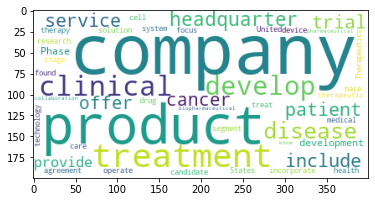

Wordcloud of the sector Utilities: 


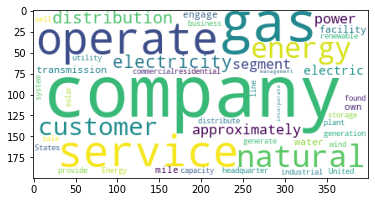

Wordcloud of the sector Consumer Defensive: 


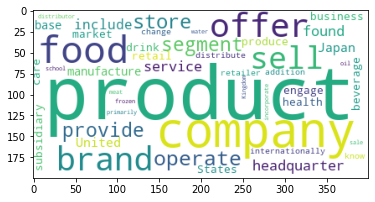

Wordcloud of the sector Consumer Cyclical: 


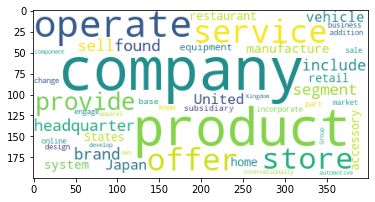

Wordcloud of the sector Financial Services: 


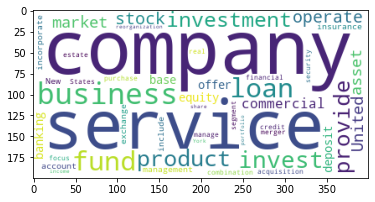

Wordcloud of the sector Basic Materials: 


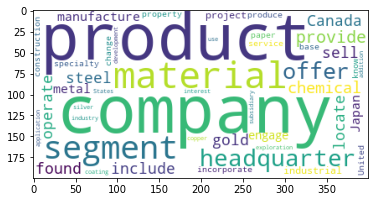

Wordcloud of the sector Energy: 


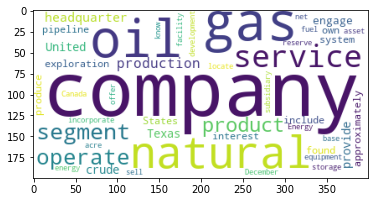

Wordcloud of the sector Industrials: 


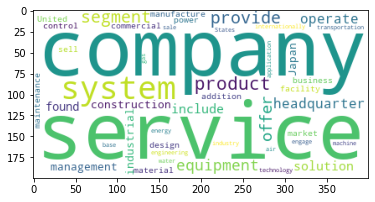

Wordcloud of the sector Technology: 


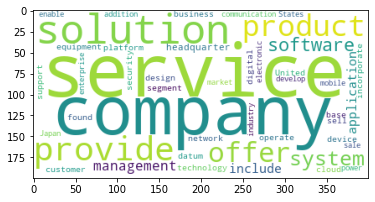

Wordcloud of the sector Communication Services: 


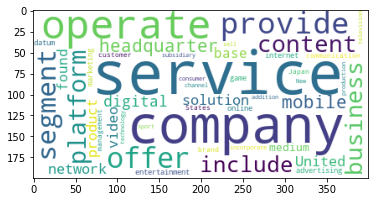

Wordcloud of the sector Real Estate: 


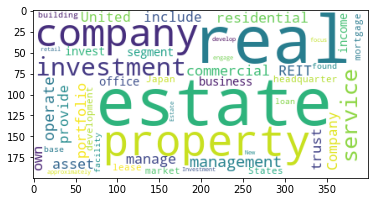

In [182]:
for sector in cloud_dict:
    freq = cloud_dict[sector]
    print(f"Wordcloud of the sector {sector}: ")
    wordcloud = WordCloud(background_color='white', max_words = n_words*3).generate_from_frequencies(freq)
    plt.imshow(wordcloud)
    plt.show()